In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import librosa
import time

In [2]:
def spectral_flux(spec):
    """
    Computes the spectral flux of a spectrogram
    :param spec: a 2-D array of floats
    :return: a numpy array
    """
    return np.sum(np.square(half_rectify(np.absolute(spec[:, 1:]) -
                                         np.absolute(spec[:, :-1]))), 0)


def half_rectify(n):
    return np.fmax(n, np.zeros_like(n))

In [6]:
filename = '../audio/NSDNS_20110902_192900.wav'
outfile = "../detection_functions/NSDNS_SF_51_ground.npy"

# Load audio and compute spectrogram
sr = 24000
n_fft = 256         # =win_length
win_length = n_fft
hop_length = 128.0

hop_size = hop_length/sr # in seconds
win_size = win_length/sr # in seconds
dt = hop_length/sr

num_hops_per_block = 100000
duration = None

block_size = hop_size*num_hops_per_block+win_size # in secs

In [7]:
streaming_prob = np.asarray([])
block_i = 0
# Iterate through signal by large blocks (constrained by RAM)
done = False
while not done:
    print "Predicting next block... offset=" + str(offset) + ' ' + str(time.clock())
    offset = block_i*block_size
    y, _ = librosa.load(filename, offset=offset, duration=block_size, sr=sr)
    if len(y) < block_size*sr or (duration is not None and offset > duration):
        print "last one!"
        # BAD!!! Throwing out last bit of data
        break
        done = True
    D = librosa.core.stft(y, n_fft=n_fft, hop_length=hop_length)
    print D.shape

    streaming_prob = np.append(streaming_prob, spectral_flux(D))
    block_i += 1

streaming_prob /= np.max(streaming_prob)
inv_streaming_prob = np.ones_like(streaming_prob)-streaming_prob
out = np.column_stack((streaming_prob, inv_streaming_prob))


print dt

Predicting next block...12.466574
(129, 10001)
Predicting next block...12.655126
(129, 10001)
Predicting next block...12.855114
(129, 10001)
Predicting next block...13.095224
(129, 10001)
Predicting next block...13.37795
(129, 10001)
Predicting next block...13.67239
(129, 10001)
Predicting next block...14.00144
(129, 10001)
Predicting next block...14.364011
(129, 10001)
Predicting next block...14.762673
(129, 10001)
Predicting next block...15.199536
(129, 10001)
Predicting next block...15.671611
(129, 10001)
Predicting next block...16.18795
(129, 10001)
Predicting next block...16.72281
(129, 10001)
Predicting next block...17.290943
(129, 10001)
Predicting next block...17.954075
(129, 10001)
Predicting next block...18.623094
(129, 10001)
Predicting next block...19.371649
(129, 10001)
Predicting next block...20.120278
(129, 10001)
Predicting next block...20.958372
(129, 10001)
Predicting next block...21.907532
(129, 10001)
Predicting next block...22.843424
(129, 10001)
Predicting next bl

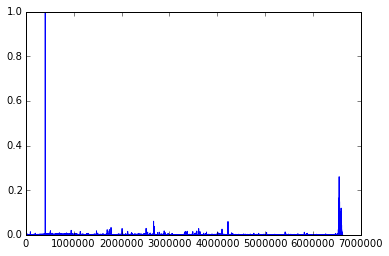

In [8]:
plt.plot(streaming_prob)

In [9]:
np.save(outfile, out)